#Estudo de dados sobre dois datasets diferentes, onde o objetivo é cruzar as informações gerais dos países com o número de casos e mortes do covid

1. Coletar dados
2. Realizar pré-processamento dos dados

– Definição de tipos

– Tratamento de dados ausentes

– Normalização e discretização

– Limpeza de dados (univariado, bivariado e
multivariado)

3. Apresentar estatísticas descritivas dos dados
com visualizações
4. Realizar teste de hipóteses para comparação
de valores de categorias (ex. preço m2 em
diferentes bairros) e visualizar diferenças
• Bônus:

– Integrar dados ou extrair dados da Web

– Utilizar técnicas não cobertas nas aulas

#1. COLETAR DADOS

## Preparação dos Datasets

Links dos Datasets:

*   https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023/data
*   https://www.worldometers.info/coronavirus/





In [1208]:
import pandas as pd
import numpy as np

###DataFrame COVID-19


coletar os dados de um website sobre o COVID-19 e inserí-los em um dataset

In [1209]:
from bs4 import BeautifulSoup
import requests

puxando a url e separando apenas as tags html em uma variavel:

In [1210]:
url = 'https://www.worldometers.info/coronavirus/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [1211]:
#print(soup)

pegando a tabela necessária:

In [1212]:
table = soup.find('table', class_ = 'table table-bordered table-hover main_table_countries')

tornando as tags th(table head) os headers do dataframe:

In [1213]:
headers = table.find_all('th')

headers_covid = [title.text for title in headers]

print(headers_covid)

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']


In [1214]:
dfcov = pd.DataFrame(columns = headers_covid)

dfcov

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop


separando todas as tags tr(table row) e linha a linha inserindo no dataset:

In [1215]:
dados_coluna = table.find_all('tr')

for linha in dados_coluna[1:]:
  dados_linha = linha.find_all('td')
  dados_indiv = [data.text.strip() for data in dados_linha]

  dfcov.loc[len(dfcov)] = dados_indiv

resultado do dataset pronto do covid:

In [1216]:
dfcov

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,North America,"131,889,132",,"1,695,941",,"127,665,129",+350,"2,528,062","6,095",...,,,,North America,,,,,,
1,,Asia,"221,500,265",,"1,553,662",,"205,673,091",,"14,273,512","14,733",...,,,,Asia,,,,,,
2,,Europe,"253,406,198",,"2,101,824",,"248,754,104",+474,"2,550,270","4,453",...,,,,Europe,,,,,,
3,,South America,"70,200,879",,"1,367,332",,"66,683,585",,"2,149,962","8,953",...,,,,South America,,,,,,
4,,Oceania,"14,895,771",,"33,015",,"14,752,388",,"110,368",31,...,,,,Australia/Oceania,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,,Total:,"70,200,879",,"1,367,332",,"66,683,585",,"2,149,962","8,953",...,,,,South America,,,,,,
243,,Total:,"14,895,771",,"33,015",,"14,752,388",,"110,368",31,...,,,,Australia/Oceania,,,,,,
244,,Total:,"12,860,924",,"258,892",,"12,090,808",,"511,224",529,...,,,,Africa,,,,,,
245,,Total:,721,,15,,706,,0,0,...,,,,,,,,,,


### DataFrame PAÍSES

#### Informações sobre as colunas:

informações sobre cada coluna do dataset do kaggle:

        Country: Name of the country.
        Density (P/Km2): Population density measured in persons per square kilometer.
        Abbreviation: Abbreviation or code representing the country.
        Agricultural Land (%): Percentage of land area used for agricultural purposes.
        Land Area (Km2): Total land area of the country in square kilometers.
        Armed Forces Size: Size of the armed forces in the country.
        Birth Rate: Number of births per 1,000 population per year.
        Calling Code: International calling code for the country.
        Capital/Major City: Name of the capital or major city.
        CO2 Emissions: Carbon dioxide emissions in tons.
        CPI: Consumer Price Index, a measure of inflation and purchasing power.
        CPI Change (%): Percentage change in the Consumer Price Index compared to the previous year.
        Currency_Code: Currency code used in the country.
        Fertility Rate: Average number of children born to a woman during her lifetime.
        Forested Area (%): Percentage of land area covered by forests.
        Gasoline_Price: Price of gasoline per liter in local currency.
        GDP: Gross Domestic Product, the total value of goods and services produced in the country.
        Gross Primary Education Enrollment (%): Gross enrollment ratio for primary education.
        Gross Tertiary Education Enrollment (%): Gross enrollment ratio for tertiary education.
        Infant Mortality: Number of deaths per 1,000 live births before reaching one year of age.
        Largest City: Name of the country's largest city.
        Life Expectancy: Average number of years a newborn is expected to live.
        Maternal Mortality Ratio: Number of maternal deaths per 100,000 live births.
        Minimum Wage: Minimum wage level in local currency.
        Official Language: Official language(s) spoken in the country.
        Out of Pocket Health Expenditure (%): Percentage of total health expenditure paid out-of-pocket by individuals.
        Physicians per Thousand: Number of physicians per thousand people.
        Population: Total population of the country.
        Population: Labor Force Participation (%): Percentage of the population that is part of the labor force.
        Tax Revenue (%): Tax revenue as a percentage of GDP.
        Total Tax Rate: Overall tax burden as a percentage of commercial profits.
        Unemployment Rate: Percentage of the labor force that is unemployed.
        Urban Population: Percentage of the population living in urban areas.
        Latitude: Latitude coordinate of the country's location.
        Longitude: Longitude coordinate of the country's location.

#### Carregando e verificando as colunas do DataFrame

lendo o dataset do arquivo csv:

In [1217]:
dfcoun = pd.read_csv('/content/world-data-2023.csv')

In [1218]:
dfcoun.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


#2. REALIZAR PRÉ-PROCESSAMENTO DOS DADOS

##Antes de Mergir os DataFrames

###Pré-processamento COVID-19


separando as colunas que sarão utilizadas do dataframe do covid:

In [1219]:
colunas_utilizadas_covid = ['Country,Other', 'TotalCases', 'TotalDeaths', 'TotalRecovered']
dfcov = dfcov[colunas_utilizadas_covid].copy()

renomeando as colunas:

In [1220]:
renomeando_colunas = {'Country,Other': 'pais', 'TotalCases': 'casos', 'TotalDeaths': 'mortes', 'TotalRecovered': 'recuperacoes'}
dfcov.rename(columns = renomeando_colunas, inplace = True)

In [1221]:
dfcov

,pais,casos,mortes,recuperacoes
0,North America,"131,889,132","1,695,941","127,665,129"
1,Asia,"221,500,265","1,553,662","205,673,091"
2,Europe,"253,406,198","2,101,824","248,754,104"
3,South America,"70,200,879","1,367,332","66,683,585"
4,Oceania,"14,895,771","33,015","14,752,388"
...,...,...,...,...
242,Total:,"70,200,879","1,367,332","66,683,585"
243,Total:,"14,895,771","33,015","14,752,388"
244,Total:,"12,860,924","258,892","12,090,808"
245,Total:,721,15,706


In [1222]:
dropando_linhas = [0, 1, 2, 3, 4, 5, 6, 7, 239, 240, 241, 242, 243, 244, 245, 246]
dfcovid = dfcov.drop(dropando_linhas)

In [1223]:
dfcovid

,pais,casos,mortes,recuperacoes
8,USA,"111,820,082","1,219,487","109,814,428"
9,India,"45,035,393","533,570",N/A
10,France,"40,138,560","167,642","39,970,918"
11,Germany,"38,828,995","183,027","38,240,600"
12,Brazil,"38,743,918","711,380","36,249,161"
...,...,...,...,...
234,Tokelau,80,,
235,Vatican City,29,,29
236,Western Sahara,10,1,9
237,MS Zaandam,9,2,7


###Pré-processamento Paises

eliminando todas as colunas não necessárias:

In [1224]:
#colunas_para_eliminar = ['Abbreviation', 'Agricultural Land( %)', 'Armed Forces size', 'Birth Rate',
#                         'Calling Code', 'Capital/Major City', 'Co2-Emissions', 'Currency-Code',
#                         'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'Infant mortality',
#                         'Largest city', 'Life expectancy', 'Maternal mortality ratio',
#                         'Official language', 'Population: Labor force participation (%)',
#                         'Longitude', 'CPI', 'CPI Change (%)']

In [1225]:
colunas_para_eliminar = ['Abbreviation', 'Agricultural Land( %)', 'Armed Forces size', 'Birth Rate', 'Calling Code', 'Capital/Major City', 'Co2-Emissions', 'Currency-Code', 'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'Infant mortality', 'Largest city', 'Life expectancy', 'Maternal mortality ratio', 'Official language', 'Population: Labor force participation (%)','Longitude', 'CPI', 'CPI Change (%)']
dfcountries = dfcoun.drop(columns=colunas_para_eliminar)

In [1226]:
dfcountries.head()

,Country,Density\n(P/Km2),Land Area(Km2),GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude
0,Afghanistan,60,"652,230","$19,101,353,833",104.00%,9.70%,$0.43,78.40%,0.28,"38,041,754",9.30%,71.40%,11.12%,"9,797,273",33.939110
1,Albania,105,"28,748","$15,278,077,447",107.00%,55.00%,$1.12,56.90%,1.20,"2,854,191",18.60%,36.60%,12.33%,"1,747,593",41.153332
2,Algeria,18,"2,381,741","$169,988,236,398",109.90%,51.40%,$0.95,28.10%,1.72,"43,053,054",37.20%,66.10%,11.70%,"31,510,100",28.033886
3,Andorra,164,468,"$3,154,057,987",106.40%,NaN,$6.63,36.40%,3.33,"77,142",NaN,NaN,NaN,"67,873",42.506285
4,Angola,26,"1,246,700","$94,635,415,870",113.50%,9.30%,$0.71,33.40%,0.21,"31,825,295",9.20%,49.10%,6.89%,"21,061,025",-11.202692


Renomeando todas as colunas selecionadas:

In [1227]:
#novos_nomes = {'Country': 'pais', 'Density\n(P/Km2)': 'densidade', 'Land Area(Km2)': 'area', 'GDP': 'pib',
#               'Gross primary education enrollment (%)': 'educacao primaria', 'Gross tertiary education enrollment (%)': 'educacao terciaria',
#               'Minimum wage': 'salario minimo', 'Out of pocket health expenditure': 'despesa de saude privada',
#               'Physicians per thousand': 'medicos por milhar', 'Population': 'populacao', 'Tax revenue (%)': 'receita tributaria',
#               'Total tax rate': 'taxa tributaria total', 'Unemployment rate': 'desemprego', 'Urban_population': 'populacao urbana',
#               'Latitude': 'latitude'}

In [1228]:
novos_nomes = {'Country': 'pais', 'Density\n(P/Km2)': 'densidade', 'Land Area(Km2)': 'area', 'GDP': 'pib', 'Gross primary education enrollment (%)': 'educacao primaria', 'Gross tertiary education enrollment (%)': 'educacao terciaria', 'Minimum wage': 'salario minimo', 'Out of pocket health expenditure': 'despesa de saude privada', 'Physicians per thousand': 'medicos por milhar', 'Population': 'populacao', 'Tax revenue (%)': 'receita tributaria', 'Total tax rate': 'taxa tributaria total', 'Unemployment rate': 'desemprego', 'Urban_population': 'populacao urbana', 'Latitude': 'latitude'}
dfcountries.rename(columns=novos_nomes, inplace=True)

In [1229]:
dfcountries.head()

,pais,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
0,Afghanistan,60,"652,230","$19,101,353,833",104.00%,9.70%,$0.43,78.40%,0.28,"38,041,754",9.30%,71.40%,11.12%,"9,797,273",33.939110
1,Albania,105,"28,748","$15,278,077,447",107.00%,55.00%,$1.12,56.90%,1.20,"2,854,191",18.60%,36.60%,12.33%,"1,747,593",41.153332
2,Algeria,18,"2,381,741","$169,988,236,398",109.90%,51.40%,$0.95,28.10%,1.72,"43,053,054",37.20%,66.10%,11.70%,"31,510,100",28.033886
3,Andorra,164,468,"$3,154,057,987",106.40%,NaN,$6.63,36.40%,3.33,"77,142",NaN,NaN,NaN,"67,873",42.506285
4,Angola,26,"1,246,700","$94,635,415,870",113.50%,9.30%,$0.71,33.40%,0.21,"31,825,295",9.20%,49.10%,6.89%,"21,061,025",-11.202692


###corrigindo os nomes de paises que estao de formas diferentes:

corrigindo os nomes de paises que estão de alguma forma divergentes nos dois datasets:

In [1230]:
dfcovid['pais'] = dfcovid['pais'].str.replace('Bahamas', 'The Bahamas')
dfcovid['pais'] = dfcovid['pais'].str.replace('Cabo Verde', 'Cape Verde')
dfcovid['pais'] = dfcovid['pais'].str.replace('CAR', 'Central African Republic')
dfcovid['pais'] = dfcovid['pais'].str.replace('Congo', 'Republic of the Congo')
dfcovid['pais'] = dfcovid['pais'].str.replace('DRC', 'Democratic Republic of the Congo')
dfcovid['pais'] = dfcovid['pais'].str.replace('Gambia', 'The Gambia')
dfcovid['pais'] = dfcovid['pais'].str.replace('Ireland', 'Republic of Ireland')
dfcovid['pais'] = dfcovid['pais'].str.replace('DPRK', 'North Korea')
dfcovid['pais'] = dfcovid['pais'].str.replace('Palestine', 'Palestinian National Authority')
dfcovid['pais'] = dfcovid['pais'].str.replace('St. Vincent Grenadines', 'Saint Vincent and the Grenadines')
dfcovid['pais'] = dfcovid['pais'].str.replace('S. Korea', 'South Korea')
dfcovid['pais'] = dfcovid['pais'].str.replace('Timor-Leste', 'East Timor')
dfcovid['pais'] = dfcovid['pais'].str.replace('UK', 'United Kingdom')
dfcovid['pais'] = dfcovid['pais'].str.replace('UAE', 'United Arab Emirates')
dfcovid['pais'] = dfcovid['pais'].str.replace('USA', 'United States')

dfcountries['pais'] = dfcountries['pais'].str.replace('S�����������', 'Sao Tome and Principe')

### Mergindo os DataFrames em instancias iguais de países

mergindo os dois dataframes em um novo dataframe pelo nome do pais, em inner join, ou seja, selecionando apenas as instancias que existem nos dois dataframes

In [1231]:
df = pd.merge(dfcovid, dfcountries, on='pais', how='inner')

##Depois de Mergir os DataFrames

###Tratando as colunas

Verificando como o dataset ficou após o processo de merging:

In [1232]:
df.head(20)

,pais,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
0,United States,"111,820,082","1,219,487","109,814,428",36,"9,833,517","$21,427,700,000,000",101.80%,88.20%,$7.25,11.10%,2.61,"328,239,523",9.60%,36.60%,14.70%,"270,663,028",37.090240
1,India,"45,035,393","533,570",N/A,464,"3,287,263","$2,611,000,000,000",113.00%,28.10%,$0.30,65.10%,0.86,"1,366,417,754",11.20%,49.70%,5.36%,"471,031,528",20.593684
2,France,"40,138,560","167,642","39,970,918",119,"643,801","$2,715,518,274,227",102.50%,65.60%,$11.16,6.80%,3.27,"67,059,887",24.20%,60.70%,8.43%,"54,123,364",46.227638
3,Germany,"38,828,995","183,027","38,240,600",240,"357,022","$3,845,630,030,824",104.00%,70.20%,$9.99,12.50%,4.25,"83,132,799",11.50%,48.80%,3.04%,"64,324,835",51.165691
4,Brazil,"38,743,918","711,380","36,249,161",25,"8,515,770","$1,839,758,040,766",115.40%,51.30%,$1.53,28.30%,2.15,"212,559,417",14.20%,65.10%,12.08%,"183,241,641",-14.235004
5,South Korea,"34,571,873","35,934","34,535,939",527,"99,720","$2,029,000,000,000",98.10%,94.30%,$6.49,36.80%,2.36,"51,709,098",15.60%,33.20%,4.15%,"42,106,719",35.907757
6,Japan,"33,803,572","74,694",N/A,347,"377,944","$5,081,769,542,380",98.80%,63.20%,$6.77,13.10%,2.41,"126,226,568",11.90%,46.70%,2.29%,"115,782,416",36.204824
7,Italy,"26,723,249","196,487","26,361,218",206,"301,340","$2,001,244,392,042",101.90%,61.90%,NaN,22.80%,3.98,"60,297,396",24.30%,59.10%,9.89%,"42,651,966",41.871940
8,United Kingdom,"24,910,387","232,112","24,678,275",281,"243,610","$2,827,113,184,696",101.20%,60.00%,$10.13,14.80%,2.81,"66,834,405",25.50%,30.60%,3.85%,"55,908,316",55.378051
9,Russia,"24,124,215","402,756","23,545,818",9,"17,098,240","$1,699,876,578,871",102.60%,81.90%,$0.53,36.40%,4.01,"144,373,535",11.40%,46.20%,4.59%,"107,683,889",61.524010


Verificando o describe, vendo que há dados faltantes e médias, medianas inexistentes, ou seja, colunas não numericas

In [1233]:
df.describe(include='all')

,pais,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
count,192,192,192,192,192,191,190,185,180,148,185,185.000000,191,167,181,174,187,191.000000
unique,192,192,187,160,135,191,190,139,169,114,159,NaN,191,118,154,162,187,NaN
top,United States,"111,820,082",885,N/A,25,"9,833,517","$21,427,700,000,000",104.00%,10.20%,$0.41,15.20%,NaN,"328,239,523",19.50%,36.60%,4.59%,"270,663,028",NaN
freq,1,1,2,33,7,1,1,4,3,3,3,NaN,1,4,4,3,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.834432,NaN,NaN,NaN,NaN,NaN,18.888500
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.684916,NaN,NaN,NaN,NaN,NaN,23.988047
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,NaN,NaN,NaN,NaN,-40.900557
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,NaN,NaN,NaN,NaN,NaN,4.372880
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.410000,NaN,NaN,NaN,NaN,NaN,17.189877
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.920000,NaN,NaN,NaN,NaN,NaN,40.106102


In [1234]:
df.dtypes

pais                         object
casos                        object
mortes                       object
recuperacoes                 object
densidade                    object
area                         object
pib                          object
educacao primaria            object
educacao terciaria           object
salario minimo               object
despesa de saude privada     object
medicos por milhar          float64
populacao                    object
receita tributaria           object
taxa tributaria total        object
desemprego                   object
populacao urbana             object
latitude                    float64
dtype: object

Mudando a coluna pais para categoria

In [1235]:
df['pais'] = df['pais'].astype('category')

Mudando todos as outras colunas para tipo float e tratando caracteres especias

In [1236]:
tratamento = ['casos', 'mortes', 'recuperacoes', 'densidade', 'area', 'pib', 'educacao primaria', 'educacao terciaria', 'salario minimo', 'despesa de saude privada', 'populacao', 'receita tributaria', 'taxa tributaria total', 'desemprego', 'populacao urbana']

for coluna in tratamento:
    df[coluna] = df[coluna].str.replace(',', '')
    df[coluna] = df[coluna].str.replace(r'[^0-9.]', '', regex=True)
    df[coluna] = df[coluna].replace('', '0')
    df[coluna] = df[coluna].astype(float)

In [1237]:
df.dtypes

pais                        category
casos                        float64
mortes                       float64
recuperacoes                 float64
densidade                    float64
area                         float64
pib                          float64
educacao primaria            float64
educacao terciaria           float64
salario minimo               float64
despesa de saude privada     float64
medicos por milhar           float64
populacao                    float64
receita tributaria           float64
taxa tributaria total        float64
desemprego                   float64
populacao urbana             float64
latitude                     float64
dtype: object

Agora há presença de médias e medianas e todos os valores são numericos

In [1238]:
df.describe(include='all')

,pais,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
count,192,1.920000e+02,1.920000e+02,1.920000e+02,192.000000,1.910000e+02,1.900000e+02,185.000000,180.000000,148.000000,185.000000,185.000000,1.910000e+02,167.000000,181.000000,174.000000,1.870000e+02,191.000000
unique,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.568262e+06,3.607701e+04,2.825195e+06,357.463542,6.974841e+05,4.833182e+11,102.584324,38.117222,2.197568,32.688649,1.834432,3.991215e+07,16.532335,40.684530,6.931954,2.260352e+07,18.888500
std,NaN,1.089377e+07,1.189974e+05,1.001146e+07,1997.944519,1.935497e+06,2.188767e+12,13.210899,29.300514,2.988231,18.944063,1.684916,1.461697e+08,6.970033,20.615242,5.089341,7.599783e+07,23.988047
min,NaN,2.900000e+01,0.000000e+00,0.000000e+00,2.000000,0.000000e+00,4.727146e+07,23.400000,0.800000,0.010000,0.200000,0.010000,8.360000e+02,0.000000,8.000000,0.090000,5.464000e+03,-40.900557
25%,NaN,4.595375e+04,4.152500e+02,9.400750e+03,35.750000,2.445650e+04,8.465710e+09,99.300000,12.225000,0.400000,17.600000,0.340000,2.004434e+06,11.700000,30.600000,3.405000,1.156252e+06,4.372880
50%,NaN,3.499355e+05,3.694000e+03,1.276595e+05,88.000000,1.205380e+05,3.425222e+10,102.600000,31.250000,1.045000,30.900000,1.410000,8.877067e+06,16.300000,37.100000,5.375000,4.694702e+06,17.189877
75%,NaN,1.737686e+06,1.888900e+04,1.275654e+06,215.250000,5.541675e+05,2.322825e+11,108.100000,63.125000,2.422500,43.900000,2.920000,2.888532e+07,21.000000,47.800000,9.530000,1.544098e+07,40.106102


In [1239]:
df.shape

(192, 18)

###Dados Ausentes

Verificando a quantidade de dados ausentes

In [1240]:
print(df.isnull().sum())

pais                         0
casos                        0
mortes                       0
recuperacoes                 0
densidade                    0
area                         1
pib                          2
educacao primaria            7
educacao terciaria          12
salario minimo              44
despesa de saude privada     7
medicos por milhar           7
populacao                    1
receita tributaria          25
taxa tributaria total       11
desemprego                  18
populacao urbana             5
latitude                     1
dtype: int64


Mudando toda e qualquer outra forma de valor nulo para o indicador de nulo

In [1241]:
df.replace(['', 'NaN', None, 0.0], np.nan, inplace=True)

surgiram ainda mais dados ausentes

In [1242]:
print(df.isnull().sum())

pais                         0
casos                        0
mortes                       1
recuperacoes                33
densidade                    0
area                         2
pib                          2
educacao primaria            7
educacao terciaria          12
salario minimo              44
despesa de saude privada     7
medicos por milhar           7
populacao                    1
receita tributaria          27
taxa tributaria total       11
desemprego                  18
populacao urbana             5
latitude                     1
dtype: int64


In [1243]:
df.head()

,pais,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
0,United States,111820082.0,1219487.0,109814428.0,36.0,9833517.0,2.142770e+13,101.8,88.2,7.25,11.1,2.61,3.282395e+08,9.6,36.6,14.70,270663028.0,37.090240
1,India,45035393.0,533570.0,NaN,464.0,3287263.0,2.611000e+12,113.0,28.1,0.30,65.1,0.86,1.366418e+09,11.2,49.7,5.36,471031528.0,20.593684
2,France,40138560.0,167642.0,39970918.0,119.0,643801.0,2.715518e+12,102.5,65.6,11.16,6.8,3.27,6.705989e+07,24.2,60.7,8.43,54123364.0,46.227638
3,Germany,38828995.0,183027.0,38240600.0,240.0,357022.0,3.845630e+12,104.0,70.2,9.99,12.5,4.25,8.313280e+07,11.5,48.8,3.04,64324835.0,51.165691
4,Brazil,38743918.0,711380.0,36249161.0,25.0,8515770.0,1.839758e+12,115.4,51.3,1.53,28.3,2.15,2.125594e+08,14.2,65.1,12.08,183241641.0,-14.235004


tratando os dados ausentes em recuperações, pois nada mais é que o numero de casos subtraindo o numero de mortos

In [1244]:
df['recuperacoes'] = df['casos'] - df['mortes']

In [1245]:
print(df.isnull().sum())

pais                         0
casos                        0
mortes                       1
recuperacoes                 1
densidade                    0
area                         2
pib                          2
educacao primaria            7
educacao terciaria          12
salario minimo              44
despesa de saude privada     7
medicos por milhar           7
populacao                    1
receita tributaria          27
taxa tributaria total       11
desemprego                  18
populacao urbana             5
latitude                     1
dtype: int64


verificando a tabela de correlação antes de aplicar qualquer tratamento para dados ausentes

In [1246]:
df.corr(method='spearman', numeric_only = True)

,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
casos,1.000000,0.913142,0.999919,0.020322,0.422423,0.887240,0.001140,0.683405,0.409692,-0.064244,0.603381,0.586164,0.026820,-0.037229,-0.015998,0.691098,0.395889
mortes,0.913142,1.000000,0.910725,-0.035835,0.538791,0.855153,-0.041102,0.561584,0.310284,0.080522,0.454901,0.675458,-0.042953,0.059834,0.079254,0.758541,0.340059
recuperacoes,0.999919,0.910725,1.000000,0.036726,0.420613,0.887249,0.000492,0.683933,0.411478,-0.066942,0.605172,0.577800,0.026199,-0.037311,-0.018299,0.689667,0.410103
densidade,0.020322,-0.035835,0.036726,1.000000,-0.565245,0.005089,0.028107,0.020770,0.100534,0.043602,0.093545,-0.076623,0.034835,-0.062394,-0.217316,-0.048672,0.149804
area,0.422423,0.538791,0.420613,-0.565245,1.000000,0.582265,-0.001841,0.016777,-0.193111,0.204521,-0.130933,0.812012,-0.404832,0.261451,0.044843,0.778515,-0.048282
pib,0.887240,0.855153,0.887249,0.005089,0.582265,1.000000,-0.060432,0.560149,0.327891,-0.003410,0.450608,0.746957,-0.180414,0.075362,-0.106585,0.843997,0.355474
educacao primaria,0.001140,-0.041102,0.000492,0.028107,-0.001841,-0.060432,1.000000,-0.089519,-0.072252,-0.120225,-0.102863,0.023667,0.040775,0.013293,-0.083129,0.001465,-0.199666
educacao terciaria,0.683405,0.561584,0.683933,0.020770,0.016777,0.560149,-0.089519,1.000000,0.612976,-0.148035,0.817185,0.047190,0.313969,-0.032101,0.124247,0.214299,0.514598
salario minimo,0.409692,0.310284,0.411478,0.100534,-0.193111,0.327891,-0.072252,0.612976,1.000000,-0.426234,0.615126,-0.157596,0.344911,-0.095281,0.119238,-0.029319,0.338659
despesa de saude privada,-0.064244,0.080522,-0.066942,0.043602,0.204521,-0.003410,-0.120225,-0.148035,-0.426234,1.000000,-0.196129,0.273361,-0.369988,0.264699,0.064517,0.202144,0.089830


In [1247]:
print(df['salario minimo'].mean())
print(df['salario minimo'].median())

2.1975675675675674
1.045


####KNN

Tentando o tratamento por KNN como ensinado em sala de aula:

In [1248]:
df2 = df.copy()

In [1249]:
df2['pais'] = df2['pais'].cat.codes

In [1250]:
!pip install fancyimpute

In [1251]:
from fancyimpute import KNN
df_knn = KNN(k=3).fit_transform(df2)

Imputing row 1/192 with 0 missing, elapsed time: 0.021
Imputing row 101/192 with 1 missing, elapsed time: 0.029


In [1252]:
df_knn.shape

(192, 18)

In [1253]:
df.columns.tolist()

['pais',
 'casos',
 'mortes',
 'recuperacoes',
 'densidade',
 'area',
 'pib',
 'educacao primaria',
 'educacao terciaria',
 'salario minimo',
 'despesa de saude privada',
 'medicos por milhar',
 'populacao',
 'receita tributaria',
 'taxa tributaria total',
 'desemprego',
 'populacao urbana',
 'latitude']

In [1254]:
df_head = pd.DataFrame(data=df_knn[0:,0:],columns=['pais', 'casos', 'mortes', 'recuperacoes', 'densidade', 'area', 'pib', 'educacao primaria', 'educacao terciaria', 'salario minimo', 'despesa de saude privada', 'medicos por milhar', 'populacao', 'receita tributaria', 'taxa tributaria total', 'desemprego', 'populacao urbana', 'latitude'])

In [1255]:
df_head.head(10)

,pais,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
0,182.0,111820082.0,1219487.0,110600595.0,36.0,9833517.0,2.142770e+13,101.8,88.2,7.250000,11.1,2.61,3.282395e+08,9.6,36.6,14.70,270663028.0,37.090240
1,72.0,45035393.0,533570.0,44501823.0,464.0,3287263.0,2.611000e+12,113.0,28.1,0.300000,65.1,0.86,1.366418e+09,11.2,49.7,5.36,471031528.0,20.593684
2,57.0,40138560.0,167642.0,39970918.0,119.0,643801.0,2.715518e+12,102.5,65.6,11.160000,6.8,3.27,6.705989e+07,24.2,60.7,8.43,54123364.0,46.227638
3,60.0,38828995.0,183027.0,38645968.0,240.0,357022.0,3.845630e+12,104.0,70.2,9.990000,12.5,4.25,8.313280e+07,11.5,48.8,3.04,64324835.0,51.165691
4,22.0,38743918.0,711380.0,38032538.0,25.0,8515770.0,1.839758e+12,115.4,51.3,1.530000,28.3,2.15,2.125594e+08,14.2,65.1,12.08,183241641.0,-14.235004
5,158.0,34571873.0,35934.0,34535939.0,527.0,99720.0,2.029000e+12,98.1,94.3,6.490000,36.8,2.36,5.170910e+07,15.6,33.2,4.15,42106719.0,35.907757
6,80.0,33803572.0,74694.0,33728878.0,347.0,377944.0,5.081770e+12,98.8,63.2,6.770000,13.1,2.41,1.262266e+08,11.9,46.7,2.29,115782416.0,36.204824
7,77.0,26723249.0,196487.0,26526762.0,206.0,301340.0,2.001244e+12,101.9,61.9,6.381065,22.8,3.98,6.029740e+07,24.3,59.1,9.89,42651966.0,41.871940
8,181.0,24910387.0,232112.0,24678275.0,281.0,243610.0,2.827113e+12,101.2,60.0,10.130000,14.8,2.81,6.683440e+07,25.5,30.6,3.85,55908316.0,55.378051
9,139.0,24124215.0,402756.0,23721459.0,9.0,17098240.0,1.699877e+12,102.6,81.9,0.530000,36.4,4.01,1.443735e+08,11.4,46.2,4.59,107683889.0,61.524010


In [1256]:
df.head(10)

,pais,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
0,United States,111820082.0,1219487.0,110600595.0,36.0,9833517.0,2.142770e+13,101.8,88.2,7.25,11.1,2.61,3.282395e+08,9.6,36.6,14.70,270663028.0,37.090240
1,India,45035393.0,533570.0,44501823.0,464.0,3287263.0,2.611000e+12,113.0,28.1,0.30,65.1,0.86,1.366418e+09,11.2,49.7,5.36,471031528.0,20.593684
2,France,40138560.0,167642.0,39970918.0,119.0,643801.0,2.715518e+12,102.5,65.6,11.16,6.8,3.27,6.705989e+07,24.2,60.7,8.43,54123364.0,46.227638
3,Germany,38828995.0,183027.0,38645968.0,240.0,357022.0,3.845630e+12,104.0,70.2,9.99,12.5,4.25,8.313280e+07,11.5,48.8,3.04,64324835.0,51.165691
4,Brazil,38743918.0,711380.0,38032538.0,25.0,8515770.0,1.839758e+12,115.4,51.3,1.53,28.3,2.15,2.125594e+08,14.2,65.1,12.08,183241641.0,-14.235004
5,South Korea,34571873.0,35934.0,34535939.0,527.0,99720.0,2.029000e+12,98.1,94.3,6.49,36.8,2.36,5.170910e+07,15.6,33.2,4.15,42106719.0,35.907757
6,Japan,33803572.0,74694.0,33728878.0,347.0,377944.0,5.081770e+12,98.8,63.2,6.77,13.1,2.41,1.262266e+08,11.9,46.7,2.29,115782416.0,36.204824
7,Italy,26723249.0,196487.0,26526762.0,206.0,301340.0,2.001244e+12,101.9,61.9,NaN,22.8,3.98,6.029740e+07,24.3,59.1,9.89,42651966.0,41.871940
8,United Kingdom,24910387.0,232112.0,24678275.0,281.0,243610.0,2.827113e+12,101.2,60.0,10.13,14.8,2.81,6.683440e+07,25.5,30.6,3.85,55908316.0,55.378051
9,Russia,24124215.0,402756.0,23721459.0,9.0,17098240.0,1.699877e+12,102.6,81.9,0.53,36.4,4.01,1.443735e+08,11.4,46.2,4.59,107683889.0,61.524010


Todos os dados ausentes foram substituidos, como o esperado:

In [1257]:
print(df_head.isnull().sum())

pais                        0
casos                       0
mortes                      0
recuperacoes                0
densidade                   0
area                        0
pib                         0
educacao primaria           0
educacao terciaria          0
salario minimo              0
despesa de saude privada    0
medicos por milhar          0
populacao                   0
receita tributaria          0
taxa tributaria total       0
desemprego                  0
populacao urbana            0
latitude                    0
dtype: int64


Vendo a tabela de correlação pela aplicação do KNN:

In [1258]:
df_head.corr(method='spearman', numeric_only = True)

,pais,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
pais,1.000000,-0.037353,-0.021656,-0.037887,0.069598,-0.004015,0.000790,-0.048456,-0.056134,0.039790,-0.126551,-0.033663,0.031687,0.020819,-0.148025,-0.003469,0.012372,-0.021597
casos,-0.037353,1.000000,0.914485,0.999919,0.020322,0.429636,0.888681,0.011890,0.654850,0.329271,-0.027411,0.573014,0.584648,-0.001236,-0.063257,-0.066472,0.697737,0.384493
mortes,-0.021656,0.914485,1.000000,0.912109,-0.050494,0.544655,0.857070,-0.027766,0.536922,0.203899,0.114971,0.422347,0.679104,-0.068930,0.009981,0.015626,0.761345,0.318275
recuperacoes,-0.037887,0.999919,0.912109,1.000000,0.021141,0.427868,0.888694,0.011458,0.655510,0.330264,-0.030007,0.574925,0.582893,-0.001490,-0.063552,-0.067899,0.696410,0.385698
densidade,0.069598,0.020322,-0.050494,0.021141,1.000000,-0.568052,-0.009929,0.011212,0.017769,0.116476,0.006119,0.097472,-0.076385,0.060025,-0.012062,-0.174423,-0.077771,0.152350
area,-0.004015,0.429636,0.544655,0.427868,-0.568052,1.000000,0.587578,-0.002307,0.048742,-0.225820,0.238243,-0.117170,0.814323,-0.375521,0.207027,0.001094,0.786393,-0.063165
pib,0.000790,0.888681,0.857070,0.888694,-0.009929,0.587578,1.000000,-0.051730,0.544707,0.249362,0.031014,0.435011,0.750095,-0.207880,0.043533,-0.133507,0.848418,0.331218
educacao primaria,-0.048456,0.011890,-0.027766,0.011458,0.011212,-0.002307,-0.051730,1.000000,-0.117740,-0.052581,-0.115103,-0.102139,0.022566,0.046983,0.004622,-0.106146,0.008046,-0.185359
educacao terciaria,-0.056134,0.654850,0.536922,0.655510,0.017769,0.048742,0.544707,-0.117740,1.000000,0.524844,-0.117985,0.781476,0.073881,0.245291,-0.014591,0.114966,0.222122,0.477458
salario minimo,0.039790,0.329271,0.203899,0.330264,0.116476,-0.225820,0.249362,-0.052581,0.524844,1.000000,-0.438150,0.556344,-0.199214,0.342808,-0.037311,0.109296,-0.071015,0.342746


Vendo a tabela de correlação do dataframe original, sem lidar com dados ausentes:

In [1259]:
df.corr(method='spearman', numeric_only = True)

,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
casos,1.000000,0.913142,0.999919,0.020322,0.422423,0.887240,0.001140,0.683405,0.409692,-0.064244,0.603381,0.586164,0.026820,-0.037229,-0.015998,0.691098,0.395889
mortes,0.913142,1.000000,0.910725,-0.035835,0.538791,0.855153,-0.041102,0.561584,0.310284,0.080522,0.454901,0.675458,-0.042953,0.059834,0.079254,0.758541,0.340059
recuperacoes,0.999919,0.910725,1.000000,0.036726,0.420613,0.887249,0.000492,0.683933,0.411478,-0.066942,0.605172,0.577800,0.026199,-0.037311,-0.018299,0.689667,0.410103
densidade,0.020322,-0.035835,0.036726,1.000000,-0.565245,0.005089,0.028107,0.020770,0.100534,0.043602,0.093545,-0.076623,0.034835,-0.062394,-0.217316,-0.048672,0.149804
area,0.422423,0.538791,0.420613,-0.565245,1.000000,0.582265,-0.001841,0.016777,-0.193111,0.204521,-0.130933,0.812012,-0.404832,0.261451,0.044843,0.778515,-0.048282
pib,0.887240,0.855153,0.887249,0.005089,0.582265,1.000000,-0.060432,0.560149,0.327891,-0.003410,0.450608,0.746957,-0.180414,0.075362,-0.106585,0.843997,0.355474
educacao primaria,0.001140,-0.041102,0.000492,0.028107,-0.001841,-0.060432,1.000000,-0.089519,-0.072252,-0.120225,-0.102863,0.023667,0.040775,0.013293,-0.083129,0.001465,-0.199666
educacao terciaria,0.683405,0.561584,0.683933,0.020770,0.016777,0.560149,-0.089519,1.000000,0.612976,-0.148035,0.817185,0.047190,0.313969,-0.032101,0.124247,0.214299,0.514598
salario minimo,0.409692,0.310284,0.411478,0.100534,-0.193111,0.327891,-0.072252,0.612976,1.000000,-0.426234,0.615126,-0.157596,0.344911,-0.095281,0.119238,-0.029319,0.338659
despesa de saude privada,-0.064244,0.080522,-0.066942,0.043602,0.204521,-0.003410,-0.120225,-0.148035,-0.426234,1.000000,-0.196129,0.273361,-0.369988,0.264699,0.064517,0.202144,0.089830


Criando uma separação de dados categoricos e dados numericos:

In [1260]:
df_categorical = df['pais']
df_numeric = df.drop(columns = ['pais'])

Vendo a correlação por média:

In [1261]:
df_mean = df.fillna(df_numeric.mean())

In [1262]:
df_mean.corr(method='spearman', numeric_only = True)

,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
casos,1.000000,0.891886,0.979422,0.020322,0.406748,0.862261,-0.002663,0.633557,0.276909,-0.067204,0.584127,0.585050,0.021502,-0.045245,-0.082348,0.651226,0.393487
mortes,0.891886,1.000000,0.911421,-0.025044,0.539728,0.853446,-0.040709,0.522285,0.165655,0.073798,0.441189,0.655694,-0.039246,0.046696,0.011906,0.738783,0.342277
recuperacoes,0.979422,0.911421,1.000000,0.046176,0.422494,0.885353,-0.003010,0.640295,0.288736,-0.069369,0.590599,0.561656,0.021500,-0.040824,-0.077210,0.668257,0.410581
densidade,0.020322,-0.025044,0.046176,1.000000,-0.536502,0.027887,0.026621,0.020699,0.148851,0.043286,0.094352,-0.066119,0.029597,-0.048527,-0.157416,-0.021203,0.149317
area,0.406748,0.539728,0.422494,-0.536502,1.000000,0.586997,-0.002327,0.012748,-0.225745,0.200554,-0.125466,0.793965,-0.375071,0.242775,-0.017204,0.745636,-0.040395
pib,0.862261,0.853446,0.885353,0.027887,0.586997,1.000000,-0.062316,0.517223,0.226798,-0.005995,0.439316,0.728607,-0.182833,0.067905,-0.154269,0.810176,0.360567
educacao primaria,-0.002663,-0.040709,-0.003010,0.026621,-0.002327,-0.062316,1.000000,-0.097242,-0.080234,-0.107344,-0.110279,0.021991,0.037263,0.014302,-0.063265,0.001858,-0.195970
educacao terciaria,0.633557,0.522285,0.640295,0.020699,0.012748,0.517223,-0.097242,1.000000,0.503467,-0.149884,0.805780,0.031010,0.296065,-0.023752,0.108739,0.203551,0.488517
salario minimo,0.276909,0.165655,0.288736,0.148851,-0.225745,0.226798,-0.080234,0.503467,1.000000,-0.406770,0.520078,-0.194099,0.320522,-0.124058,0.079954,-0.068533,0.298756
despesa de saude privada,-0.067204,0.073798,-0.069369,0.043286,0.200554,-0.005995,-0.107344,-0.149884,-0.406770,1.000000,-0.194619,0.262805,-0.329210,0.251899,0.033271,0.187464,0.084102


Vendo a correlação por mediana:

In [1263]:
df_median = df.fillna(df_numeric.median())

In [1264]:
df_median.corr(method='spearman', numeric_only = True)

,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
casos,1.000000,0.906018,0.992107,0.020322,0.416744,0.879863,-0.003308,0.649734,0.345464,-0.063160,0.590846,0.584613,0.020356,-0.032827,-0.022965,0.677613,0.393901
mortes,0.906018,1.000000,0.910781,-0.035808,0.536483,0.854835,-0.041599,0.537239,0.256291,0.078464,0.447607,0.668075,-0.039574,0.059738,0.066615,0.749248,0.338417
recuperacoes,0.992107,0.910781,1.000000,0.036666,0.417667,0.886896,-0.004652,0.656027,0.349443,-0.065973,0.597917,0.571123,0.020041,-0.033775,-0.025373,0.681004,0.408021
densidade,0.020322,-0.035808,0.036666,1.000000,-0.557213,0.005894,0.027255,0.015947,0.074458,0.039863,0.089881,-0.075997,0.030761,-0.058223,-0.204178,-0.045067,0.148788
area,0.416744,0.536483,0.417667,-0.557213,1.000000,0.580165,-0.001648,0.020747,-0.185024,0.203601,-0.124618,0.804935,-0.378876,0.251347,0.034220,0.765768,-0.048174
pib,0.879863,0.854835,0.886896,0.005894,0.580165,1.000000,-0.062962,0.535533,0.256943,-0.002385,0.446752,0.739789,-0.186713,0.076091,-0.103017,0.831769,0.352049
educacao primaria,-0.003308,-0.041599,-0.004652,0.027255,-0.001648,-0.062962,1.000000,-0.087976,-0.054477,-0.109272,-0.109024,0.021327,0.038817,0.014572,-0.078918,0.000341,-0.196877
educacao terciaria,0.649734,0.537239,0.656027,0.015947,0.020747,0.535533,-0.087976,1.000000,0.517656,-0.135828,0.805967,0.046104,0.282775,-0.030713,0.112153,0.209489,0.493622
salario minimo,0.345464,0.256291,0.349443,0.074458,-0.185024,0.256943,-0.054477,0.517656,1.000000,-0.369733,0.522334,-0.158995,0.287480,-0.079782,0.089463,-0.049626,0.257965
despesa de saude privada,-0.063160,0.078464,-0.065973,0.039863,0.203601,-0.002385,-0.109272,-0.135828,-0.369733,1.000000,-0.192314,0.266281,-0.330851,0.259288,0.059176,0.198760,0.085067


No final, cheguei a conclusão que o método que mais manteve os dados de correlação mais próximos do original foi a mediana, menos para a receita tributaria. Então, criei um novo dataset, utilizando de todos os dados do dataframe tratado com mediana, e adicionei apenas a coluna de receita tributaria da média:

In [1265]:
df2 = df_median.copy()

In [1266]:
df2['receita tributaria'] = df_mean['receita tributaria']

In [1267]:
df2.corr(method='spearman', numeric_only = True)

,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
casos,1.000000,0.906018,0.992107,0.020322,0.416744,0.879863,-0.003308,0.649734,0.345464,-0.063160,0.590846,0.584613,0.021502,-0.032827,-0.022965,0.677613,0.393901
mortes,0.906018,1.000000,0.910781,-0.035808,0.536483,0.854835,-0.041599,0.537239,0.256291,0.078464,0.447607,0.668075,-0.038672,0.059738,0.066615,0.749248,0.338417
recuperacoes,0.992107,0.910781,1.000000,0.036666,0.417667,0.886896,-0.004652,0.656027,0.349443,-0.065973,0.597917,0.571123,0.021253,-0.033775,-0.025373,0.681004,0.408021
densidade,0.020322,-0.035808,0.036666,1.000000,-0.557213,0.005894,0.027255,0.015947,0.074458,0.039863,0.089881,-0.075997,0.029597,-0.058223,-0.204178,-0.045067,0.148788
area,0.416744,0.536483,0.417667,-0.557213,1.000000,0.580165,-0.001648,0.020747,-0.185024,0.203601,-0.124618,0.804935,-0.377141,0.251347,0.034220,0.765768,-0.048174
pib,0.879863,0.854835,0.886896,0.005894,0.580165,1.000000,-0.062962,0.535533,0.256943,-0.002385,0.446752,0.739789,-0.185675,0.076091,-0.103017,0.831769,0.352049
educacao primaria,-0.003308,-0.041599,-0.004652,0.027255,-0.001648,-0.062962,1.000000,-0.087976,-0.054477,-0.109272,-0.109024,0.021327,0.037684,0.014572,-0.078918,0.000341,-0.196877
educacao terciaria,0.649734,0.537239,0.656027,0.015947,0.020747,0.535533,-0.087976,1.000000,0.517656,-0.135828,0.805967,0.046104,0.282677,-0.030713,0.112153,0.209489,0.493622
salario minimo,0.345464,0.256291,0.349443,0.074458,-0.185024,0.256943,-0.054477,0.517656,1.000000,-0.369733,0.522334,-0.158995,0.285804,-0.079782,0.089463,-0.049626,0.257965
despesa de saude privada,-0.063160,0.078464,-0.065973,0.039863,0.203601,-0.002385,-0.109272,-0.135828,-0.369733,1.000000,-0.192314,0.266281,-0.330019,0.259288,0.059176,0.198760,0.085067


Salario Minimo, que era a coluna com maior numero de entradas vazias, saiu de correlação com casos (por exemplo) de 0.327043 para 0.409692 com o KNN, 0.276909 com a média e 0.345464 com a mediana. Já a receita tributária, segunda coluna com maior numero de entradas vazias, saiu da correlação com casos de 0.040957 para 0.018014 com o KNN, 0.032759 com a média e 0.030740

###Normalizando Universalmente:

In [1268]:
df_categorical = df2['pais']
df_numeric = df2.drop(columns = ['pais'])

In [1269]:
df_log = (df_numeric.apply(lambda x: np.log10(x + 1)))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [1270]:
def normalize_latitude(df, col_name):
    df_normalized = df.copy()
    def apply_normalization(latitude):
        if latitude < 0:
            latitude_normalized = np.log(np.abs(latitude) + 1)
            latitude_normalized *= -1
        else:
            latitude_normalized = np.log(latitude + 1)
        return latitude_normalized

    df_normalized[col_name] = df[col_name].apply(apply_normalization)

    return df_normalized

df_normalized = normalize_latitude(df2, 'latitude')

In [1271]:
df_log['latitude'] = df_normalized['latitude']

In [1272]:
df_log.head()

,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
0,8.048520,6.086178,8.043757,1.568202,6.992709,13.330976,2.011993,1.950365,0.916454,1.082785,0.557507,8.516191,1.025306,1.575188,1.195900,8.432429,3.639958
1,7.653554,5.727192,7.648378,2.667453,6.516835,12.416807,2.056905,1.463893,0.113943,1.820201,0.269513,9.135583,1.086360,1.705008,0.803457,8.673050,3.072401
2,7.603562,5.224385,7.601744,2.079181,5.808752,12.433853,2.014940,1.823474,1.084934,0.892095,0.630428,7.826463,1.401401,1.790285,0.974512,7.733385,3.854979
3,7.589156,5.262518,7.587104,2.382017,5.552696,12.584968,2.021189,1.852480,1.040998,1.130334,0.720159,7.919772,1.096910,1.697229,0.606381,7.808379,3.954425
4,7.588204,5.852102,7.580155,1.414973,6.930224,12.264761,2.065953,1.718502,0.403121,1.466868,0.498311,8.327480,1.181844,1.820201,1.116608,8.263024,-2.723596


In [1273]:
print(df_log.isnull().sum())

casos                       0
mortes                      0
recuperacoes                0
densidade                   0
area                        0
pib                         0
educacao primaria           0
educacao terciaria          0
salario minimo              0
despesa de saude privada    0
medicos por milhar          0
populacao                   0
receita tributaria          0
taxa tributaria total       0
desemprego                  0
populacao urbana            0
latitude                    0
dtype: int64


###Discretizacao Individual


Aplicando discretização para toda coluna de dados numericos continuos

In [1274]:
df_disc = df_log.copy()
df_disc2 = df_log.copy()

In [1275]:
df_disc.head(20)

,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
0,8.048520,6.086178,8.043757,1.568202,6.992709,13.330976,2.011993,1.950365,0.916454,1.082785,0.557507,8.516191,1.025306,1.575188,1.195900,8.432429,3.639958
1,7.653554,5.727192,7.648378,2.667453,6.516835,12.416807,2.056905,1.463893,0.113943,1.820201,0.269513,9.135583,1.086360,1.705008,0.803457,8.673050,3.072401
2,7.603562,5.224385,7.601744,2.079181,5.808752,12.433853,2.014940,1.823474,1.084934,0.892095,0.630428,7.826463,1.401401,1.790285,0.974512,7.733385,3.854979
3,7.589156,5.262518,7.587104,2.382017,5.552696,12.584968,2.021189,1.852480,1.040998,1.130334,0.720159,7.919772,1.096910,1.697229,0.606381,7.808379,3.954425
4,7.588204,5.852102,7.580155,1.414973,6.930224,12.264761,2.065953,1.718502,0.403121,1.466868,0.498311,8.327480,1.181844,1.820201,1.116608,8.263024,-2.723596
5,7.538723,4.555518,7.538271,2.722634,4.998787,12.307282,1.996074,1.979093,0.874482,1.577492,0.526339,7.713567,1.220108,1.534026,0.711807,7.624351,3.608422
6,7.528963,4.873292,7.528002,2.541579,5.577429,12.706015,1.999131,1.807535,0.890421,1.149219,0.532754,8.101151,1.110590,1.678518,0.517196,8.063643,3.616438
7,7.426889,5.293336,7.423684,2.315970,5.479058,12.301300,2.012415,1.798651,0.310693,1.376577,0.697229,7.780299,1.403121,1.778874,1.037028,7.629939,3.758218
8,7.396380,5.365699,7.392315,2.450249,5.386697,12.451343,2.009451,1.785330,1.046495,1.198657,0.580925,7.825000,1.423246,1.499687,0.685742,7.747476,4.032080
9,7.382453,5.605043,7.375141,1.000000,7.232951,12.230417,2.015360,1.918555,0.184691,1.572872,0.699838,8.159488,1.093422,1.673942,0.747412,8.032151,4.135551


Identificando as variaveis continuas: educacao primaria, educacao terciaria, salario minimo, despesa de saude privada, receita tributaria, taxa tributaria total, desemprego, populacao urbana

In [1276]:
colunas_discretizar = ['educacao primaria', 'educacao terciaria', 'salario minimo', 'despesa de saude privada', 'receita tributaria', 'taxa tributaria total', 'desemprego', 'populacao urbana']

num_bins = 8

for coluna in colunas_discretizar:
    df_disc2[f'{coluna}_normalizado'] = pd.cut(df_disc2[coluna], bins=num_bins, labels=False)

df_disc2

,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,...,populacao urbana,latitude,educacao primaria_normalizado,educacao terciaria_normalizado,salario minimo_normalizado,despesa de saude privada_normalizado,receita tributaria_normalizado,taxa tributaria total_normalizado,desemprego_normalizado,populacao urbana_normalizado
0,8.048520,6.086178,8.043757,1.568202,6.992709,13.330976,2.011993,1.950365,0.916454,1.082785,...,8.432429,3.639958,6,7,6,4,5,3,6,7
1,7.653554,5.727192,7.648378,2.667453,6.516835,12.416807,2.056905,1.463893,0.113943,1.820201,...,8.673050,3.072401,6,5,0,7,5,4,4,7
2,7.603562,5.224385,7.601744,2.079181,5.808752,12.433853,2.014940,1.823474,1.084934,0.892095,...,7.733385,3.854979,6,6,7,3,7,4,5,6
3,7.589156,5.262518,7.587104,2.382017,5.552696,12.584968,2.021189,1.852480,1.040998,1.130334,...,7.808379,3.954425,6,6,7,4,5,4,3,6
4,7.588204,5.852102,7.580155,1.414973,6.930224,12.264761,2.065953,1.718502,0.403121,1.466868,...,8.263024,-2.723596,7,6,2,6,5,4,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,3.731911,0.301030,3.731830,2.733999,1.342423,8.123852,2.015360,1.508530,0.310693,1.503791,...,6.671608,-0.420536,6,5,2,6,6,3,4,4
188,3.706376,1.397940,3.704322,2.170262,2.909556,8.289248,2.009876,1.508530,0.310693,0.079181,...,4.809492,1.042711,6,5,2,0,6,3,4,1
189,3.468938,0.301030,3.468790,2.595496,1.431364,7.674599,1.939519,1.508530,0.310693,0.230449,...,3.867055,-2.093041,5,5,2,0,6,3,4,0
190,1.477121,3.574841,5.538116,3.301898,5.098488,10.534689,2.015360,1.508530,0.310693,1.503791,...,6.671608,3.758940,6,5,2,6,6,3,4,4


In [1277]:
colunas_discretizar = ['educacao primaria', 'educacao terciaria', 'salario minimo', 'despesa de saude privada', 'receita tributaria', 'taxa tributaria total', 'desemprego', 'populacao urbana']

num_bins = 8

for coluna in colunas_discretizar:
    df_disc[f'{coluna}'] = pd.cut(df_disc[coluna], bins=num_bins, labels=False)

df_disc

,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
0,8.048520,6.086178,8.043757,1.568202,6.992709,13.330976,6,7,6,4,0.557507,8.516191,5,3,6,7,3.639958
1,7.653554,5.727192,7.648378,2.667453,6.516835,12.416807,6,5,0,7,0.269513,9.135583,5,4,4,7,3.072401
2,7.603562,5.224385,7.601744,2.079181,5.808752,12.433853,6,6,7,3,0.630428,7.826463,7,4,5,6,3.854979
3,7.589156,5.262518,7.587104,2.382017,5.552696,12.584968,6,6,7,4,0.720159,7.919772,5,4,3,6,3.954425
4,7.588204,5.852102,7.580155,1.414973,6.930224,12.264761,7,6,2,6,0.498311,8.327480,5,4,6,6,-2.723596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,3.731911,0.301030,3.731830,2.733999,1.342423,8.123852,6,5,2,6,0.382017,4.003676,6,3,4,4,-0.420536
188,3.706376,1.397940,3.704322,2.170262,2.909556,8.289248,6,5,2,0,0.079181,5.070433,6,3,4,1,1.042711
189,3.468938,0.301030,3.468790,2.595496,1.431364,7.674599,5,5,2,0,0.283301,4.066214,6,3,4,0,-2.093041
190,1.477121,3.574841,5.538116,3.301898,5.098488,10.534689,6,5,2,6,0.382017,2.922725,6,3,4,4,3.758940


###Outlier Multivalorado

Aplicação de um código de Outliers Multivariado para todas as colunas numéricas da tabela:

In [1278]:
from sklearn.decomposition import PCA
from scipy.stats import chi2

def detect_multivariate_outliers(df, alpha=0.01):
    pca = PCA()
    pca.fit(df)

    projected = pca.transform(df)

    inv_cov = np.linalg.inv(np.cov(projected.T))
    mahalanobis_sq = np.sum((projected @ inv_cov) * projected, axis=1)

    chi2_threshold = chi2.ppf(1 - alpha, df.shape[1])

    outliers = df[mahalanobis_sq > chi2_threshold]

    return outliers

outliers = detect_multivariate_outliers(df_disc)

outliers = pd.concat([df_categorical, outliers], axis=1)

outliers = outliers.dropna()

outliers

,pais,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
30,North Korea,6.678775,1.875061,6.678768,2.332438,5.081128,10.506505,6.0,5.0,2.0,6.0,0.669317,7.409361,6.0,3.0,3.0,5.0,3.721827
65,United Arab Emirates,6.028177,3.371068,6.027220,2.075547,4.922211,11.624429,6.0,5.0,2.0,5.0,0.547775,6.989918,0.0,1.0,2.0,4.0,3.195569
83,Palestinian National Authority,5.793098,3.732796,5.789302,2.928396,5.098488,10.534689,6.0,5.0,2.0,6.0,0.382017,6.948270,6.0,3.0,4.0,4.0,3.495057
153,Somalia,4.436719,3.134177,4.414539,1.414973,5.804588,9.674009,0.0,1.0,2.0,6.0,0.008600,7.188729,6.0,3.0,5.0,4.0,1.816801
157,East Timor,4.370347,2.143015,4.367784,1.954243,4.172457,9.223636,7.0,4.0,1.0,4.0,0.235528,6.544068,7.0,1.0,3.0,2.0,-2.289927
164,Equatorial Guinea,4.236285,2.264818,4.231648,1.707570,4.447964,10.042449,4.0,0.0,2.0,7.0,0.146128,6.132256,4.0,5.0,4.0,3.0,0.974862
165,Monaco,4.235074,1.832509,4.233377,4.420583,0.477121,9.856417,6.0,5.0,7.0,3.0,0.878522,4.590675,6.0,3.0,4.0,1.0,3.800833
187,Nauru,3.731911,0.301030,3.731830,2.733999,1.342423,8.123852,6.0,5.0,2.0,6.0,0.382017,4.003676,6.0,3.0,4.0,4.0,-0.420536
188,Kiribati,3.706376,1.397940,3.704322,2.170262,2.909556,8.289248,6.0,5.0,2.0,0.0,0.079181,5.070433,6.0,3.0,4.0,1.0,1.042711
189,Tuvalu,3.468938,0.301030,3.468790,2.595496,1.431364,7.674599,5.0,5.0,2.0,0.0,0.283301,4.066214,6.0,3.0,4.0,0.0,-2.093041


In [1279]:
df_disc3 = df_disc.copy()
df_disc3 = pd.concat([df_categorical, df_disc], axis=1)
sem_outliers = df_disc3[~df_disc3.isin(outliers)].dropna()

In [1280]:
sem_outliers.shape

(180, 18)

In [1281]:
sem_outliers

,pais,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
0,United States,8.048520,6.086178,8.043757,1.568202,6.992709,13.330976,6.0,7.0,6.0,4.0,0.557507,8.516191,5.0,3.0,6.0,7.0,3.639958
1,India,7.653554,5.727192,7.648378,2.667453,6.516835,12.416807,6.0,5.0,0.0,7.0,0.269513,9.135583,5.0,4.0,4.0,7.0,3.072401
2,France,7.603562,5.224385,7.601744,2.079181,5.808752,12.433853,6.0,6.0,7.0,3.0,0.630428,7.826463,7.0,4.0,5.0,6.0,3.854979
3,Germany,7.589156,5.262518,7.587104,2.382017,5.552696,12.584968,6.0,6.0,7.0,4.0,0.720159,7.919772,5.0,4.0,3.0,6.0,3.954425
4,Brazil,7.588204,5.852102,7.580155,1.414973,6.930224,12.264761,7.0,6.0,2.0,6.0,0.498311,8.327480,5.0,4.0,6.0,6.0,-2.723596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Sierra Leone,3.890980,2.103804,3.883888,2.049218,4.855767,9.595659,6.0,0.0,1.0,6.0,0.012837,6.892830,4.0,3.0,3.0,4.0,2.247131
183,Chad,3.886604,2.290035,3.875524,1.146128,6.108565,10.053653,5.0,1.0,1.0,7.0,0.017033,7.202676,6.0,4.0,2.0,4.0,2.800579
184,Sao Tome and Principe,3.831166,1.908485,3.826010,2.359835,2.984527,8.632474,6.0,3.0,2.0,4.0,0.021189,5.332554,5.0,3.0,6.0,2.0,2.900865
185,Saint Kitts and Nevis,3.820070,1.690196,3.816904,2.313867,2.418301,9.021600,6.0,7.0,4.0,7.0,0.546543,4.722831,6.0,4.0,4.0,0.0,2.910056


Apenas 12 outliers retirados

#3. Apresentar estatísticas descritivas dos dados com visualizações

In [1282]:
df_final = sem_outliers.copy()

In [1283]:
df_final.head(20)

,pais,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
0,United States,8.048520,6.086178,8.043757,1.568202,6.992709,13.330976,6.0,7.0,6.0,4.0,0.557507,8.516191,5.0,3.0,6.0,7.0,3.639958
1,India,7.653554,5.727192,7.648378,2.667453,6.516835,12.416807,6.0,5.0,0.0,7.0,0.269513,9.135583,5.0,4.0,4.0,7.0,3.072401
2,France,7.603562,5.224385,7.601744,2.079181,5.808752,12.433853,6.0,6.0,7.0,3.0,0.630428,7.826463,7.0,4.0,5.0,6.0,3.854979
3,Germany,7.589156,5.262518,7.587104,2.382017,5.552696,12.584968,6.0,6.0,7.0,4.0,0.720159,7.919772,5.0,4.0,3.0,6.0,3.954425
4,Brazil,7.588204,5.852102,7.580155,1.414973,6.930224,12.264761,7.0,6.0,2.0,6.0,0.498311,8.327480,5.0,4.0,6.0,6.0,-2.723596
5,South Korea,7.538723,4.555518,7.538271,2.722634,4.998787,12.307282,6.0,7.0,6.0,6.0,0.526339,7.713567,6.0,3.0,3.0,5.0,3.608422
6,Japan,7.528963,4.873292,7.528002,2.541579,5.577429,12.706015,6.0,6.0,6.0,4.0,0.532754,8.101151,5.0,4.0,2.0,6.0,3.616438
7,Italy,7.426889,5.293336,7.423684,2.315970,5.479058,12.301300,6.0,6.0,2.0,5.0,0.697229,7.780299,7.0,4.0,5.0,6.0,3.758218
8,United Kingdom,7.396380,5.365699,7.392315,2.450249,5.386697,12.451343,6.0,6.0,7.0,4.0,0.580925,7.825000,7.0,3.0,3.0,6.0,4.032080
9,Russia,7.382453,5.605043,7.375141,1.000000,7.232951,12.230417,6.0,7.0,1.0,6.0,0.699838,8.159488,5.0,4.0,3.0,6.0,4.135551


In [1284]:
df_final.shape

(180, 18)

In [1285]:
df_final.describe(include='all')

,pais,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
count,180,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
unique,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.578302,3.565520,5.571851,1.897124,4.967951,10.607032,6.000000,4.538889,2.077778,5.511111,0.378421,6.832286,5.627778,3.155556,3.861111,3.838889,1.964458
std,NaN,1.014227,1.059339,1.015466,0.577090,1.108958,0.970198,0.472719,1.801191,1.874425,1.193506,0.252984,0.903657,1.019533,1.056093,1.549063,1.453810,2.437231
min,NaN,3.798720,1.041393,3.798029,0.477121,1.792392,8.344938,4.000000,0.000000,0.000000,2.000000,0.004321,4.260882,1.000000,0.000000,0.000000,0.000000,-3.735299
25%,NaN,4.755671,2.839163,4.737652,1.537680,4.444216,10.028059,6.000000,3.000000,1.000000,5.000000,0.129527,6.362015,5.000000,3.000000,3.000000,3.000000,1.755553
50%,NaN,5.596949,3.634206,5.589516,1.924279,5.163261,10.587342,6.000000,5.000000,2.000000,6.000000,0.382017,6.963135,6.000000,3.000000,4.000000,4.000000,2.900865
75%,NaN,6.270827,4.312173,6.266582,2.314393,5.763958,11.371044,6.000000,6.000000,2.250000,6.000000,0.590784,7.483903,6.000000,4.000000,5.000000,5.000000,3.715706


In [1286]:
df_final

,pais,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
0,United States,8.048520,6.086178,8.043757,1.568202,6.992709,13.330976,6.0,7.0,6.0,4.0,0.557507,8.516191,5.0,3.0,6.0,7.0,3.639958
1,India,7.653554,5.727192,7.648378,2.667453,6.516835,12.416807,6.0,5.0,0.0,7.0,0.269513,9.135583,5.0,4.0,4.0,7.0,3.072401
2,France,7.603562,5.224385,7.601744,2.079181,5.808752,12.433853,6.0,6.0,7.0,3.0,0.630428,7.826463,7.0,4.0,5.0,6.0,3.854979
3,Germany,7.589156,5.262518,7.587104,2.382017,5.552696,12.584968,6.0,6.0,7.0,4.0,0.720159,7.919772,5.0,4.0,3.0,6.0,3.954425
4,Brazil,7.588204,5.852102,7.580155,1.414973,6.930224,12.264761,7.0,6.0,2.0,6.0,0.498311,8.327480,5.0,4.0,6.0,6.0,-2.723596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Sierra Leone,3.890980,2.103804,3.883888,2.049218,4.855767,9.595659,6.0,0.0,1.0,6.0,0.012837,6.892830,4.0,3.0,3.0,4.0,2.247131
183,Chad,3.886604,2.290035,3.875524,1.146128,6.108565,10.053653,5.0,1.0,1.0,7.0,0.017033,7.202676,6.0,4.0,2.0,4.0,2.800579
184,Sao Tome and Principe,3.831166,1.908485,3.826010,2.359835,2.984527,8.632474,6.0,3.0,2.0,4.0,0.021189,5.332554,5.0,3.0,6.0,2.0,2.900865
185,Saint Kitts and Nevis,3.820070,1.690196,3.816904,2.313867,2.418301,9.021600,6.0,7.0,4.0,7.0,0.546543,4.722831,6.0,4.0,4.0,0.0,2.910056


In [1287]:
df_final['casos'].hist

<bound method hist_series of 0      8.048520
1      7.653554
2      7.603562
3      7.589156
4      7.588204
         ...   
182    3.890980
183    3.886604
184    3.831166
185    3.820070
186    3.798720
Name: casos, Length: 180, dtype: float64>

<Axes: >

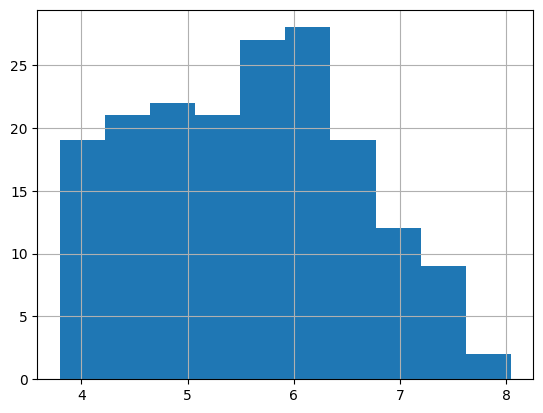

In [1288]:
df_final['recuperacoes'].hist()

<Axes: >

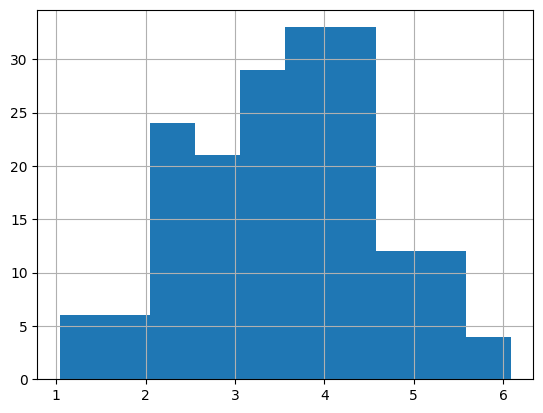

In [1289]:
df_final['mortes'].hist()

<Axes: >

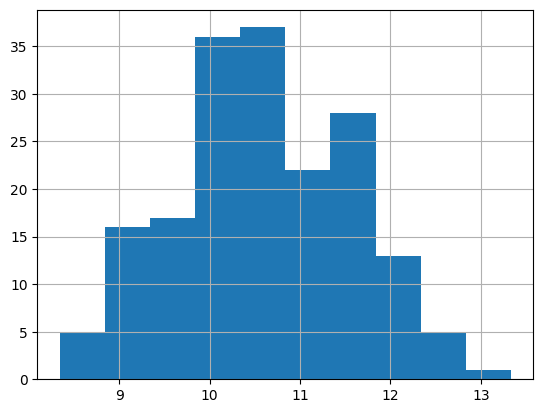

In [1290]:
df_final['pib'].hist()

<Axes: >

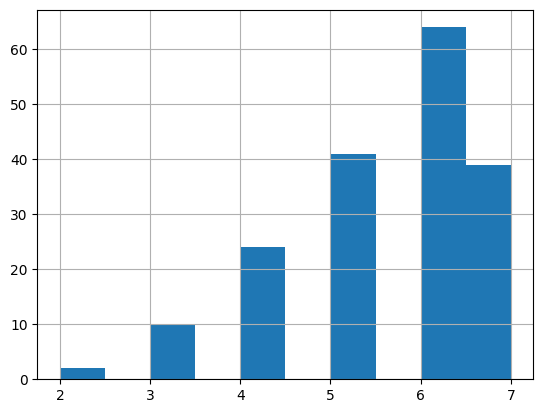

In [1291]:
df_final['despesa de saude privada'].hist()

<Axes: >

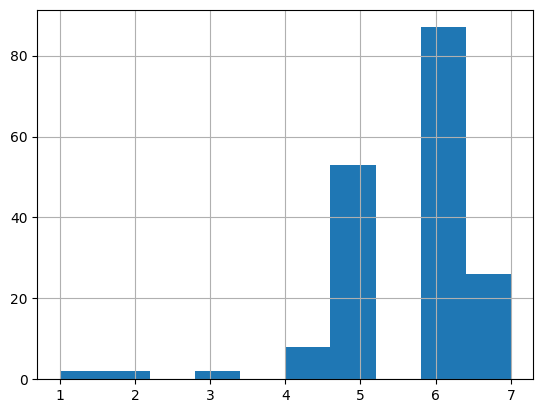

In [1292]:
df_final['receita tributaria'].hist()

<Axes: >

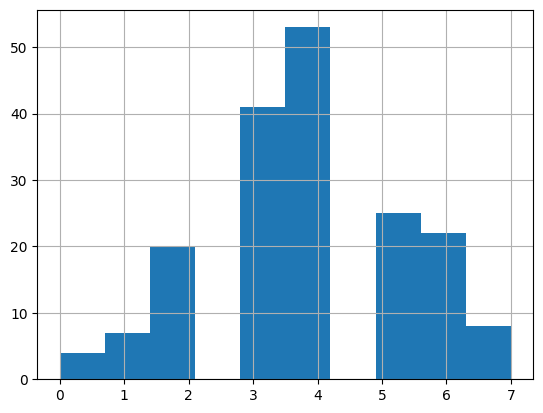

In [1293]:
df_final['desemprego'].hist()

In [1294]:
df_final.corr(method='spearman', numeric_only=True)

,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude
casos,1.000000,0.928869,0.999920,0.069329,0.392603,0.890244,0.069790,0.673848,0.363669,-0.109492,0.607387,0.557180,-0.029977,-0.062536,0.001922,0.637100,0.390008
mortes,0.928869,1.000000,0.926482,0.016631,0.512593,0.861150,0.019234,0.550448,0.266051,0.040003,0.476735,0.672334,-0.092540,0.028683,0.066204,0.727744,0.333581
recuperacoes,0.999920,0.926482,1.000000,0.069558,0.390963,0.890180,0.069522,0.674082,0.364426,-0.111696,0.608582,0.555466,-0.030085,-0.063386,0.000184,0.635569,0.390512
densidade,0.069329,0.016631,0.069558,1.000000,-0.559531,0.035980,0.066201,0.015742,0.101948,0.090646,0.065524,-0.023155,0.020914,-0.084064,-0.175443,-0.044122,0.141076
area,0.392603,0.512593,0.390963,-0.559531,1.000000,0.557984,-0.030940,0.007761,-0.197245,0.139021,-0.129747,0.796304,-0.361523,0.274116,0.024210,0.769693,-0.081305
pib,0.890244,0.861150,0.890180,0.035980,0.557984,1.000000,-0.005662,0.551093,0.279929,-0.054186,0.450576,0.736119,-0.196979,0.046337,-0.085918,0.800798,0.330657
educacao primaria,0.069790,0.019234,0.069522,0.066201,-0.030940,-0.005662,1.000000,-0.052720,-0.063846,-0.138729,-0.044393,0.016804,0.007419,-0.000054,-0.092307,0.004097,-0.160085
educacao terciaria,0.673848,0.550448,0.674082,0.015742,0.007761,0.551093,-0.052720,1.000000,0.520998,-0.101723,0.808070,0.043845,0.197743,-0.014130,0.138643,0.180002,0.488009
salario minimo,0.363669,0.266051,0.364426,0.101948,-0.197245,0.279929,-0.063846,0.520998,1.000000,-0.361906,0.538217,-0.159171,0.260126,-0.113801,0.127741,-0.077343,0.292212
despesa de saude privada,-0.109492,0.040003,-0.111696,0.090646,0.139021,-0.054186,-0.138729,-0.101723,-0.361906,1.000000,-0.163133,0.218882,-0.260366,0.242281,0.038633,0.156822,0.082019


Número de casos aparentemente teve uma alta correlação com Densidade, Educação Primária, Educação Terciária, Médicos por Milhar, População, População Urbana e **PRINCIPALMENTE** o PIB com 0.890244. Sugerindo que paises mais ativos em educação, tratamentos dos doentes e população aglomerada em pequenos espaços, tiveram uma maior proliferação do vírus. Além disso, maior PIB, menor desemprego torna que as pessoas precisem sair de casa, pegar transportes públicos em pequenos espaços, facilitando a contaminação. E, maiores gastos com a saúde privada, teve alguma correlação com diminuição de casos.

#4. Realizar teste de hipóteses para comparação de valores de categorias (ex. preço m2 em diferentes bairros) e visualizar diferenças

In [1198]:
df_final['mortalidade'] = (df2['mortes']/df2['casos']) * 100

In [1199]:
df_final.head()

,pais,casos,mortes,recuperacoes,densidade,area,pib,educacao primaria,educacao terciaria,salario minimo,despesa de saude privada,medicos por milhar,populacao,receita tributaria,taxa tributaria total,desemprego,populacao urbana,latitude,mortalidade
0,United States,8.048520,6.086178,8.043757,1.568202,6.992709,13.330976,6.0,7.0,6.0,4.0,0.557507,8.516191,5.0,3.0,6.0,7.0,3.639958,1.090580
1,India,7.653554,5.727192,7.648378,2.667453,6.516835,12.416807,6.0,5.0,0.0,7.0,0.269513,9.135583,5.0,4.0,4.0,7.0,3.072401,1.184779
2,France,7.603562,5.224385,7.601744,2.079181,5.808752,12.433853,6.0,6.0,7.0,3.0,0.630428,7.826463,7.0,4.0,5.0,6.0,3.854979,0.417658
3,Germany,7.589156,5.262518,7.587104,2.382017,5.552696,12.584968,6.0,6.0,7.0,4.0,0.720159,7.919772,5.0,4.0,3.0,6.0,3.954425,0.471367
4,Brazil,7.588204,5.852102,7.580155,1.414973,6.930224,12.264761,7.0,6.0,2.0,6.0,0.498311,8.327480,5.0,4.0,6.0,6.0,-2.723596,1.836108


In [1200]:
df_final['mortalidade'].describe()

count    180.000000
mean       1.459402
std        1.667421
min        0.033494
25%        0.640480
50%        1.161742
75%        1.928225
max       18.074508
Name: mortalidade, dtype: float64

In [1201]:
id = df_final['mortalidade'].idxmax()
pais = df_final.loc[id, 'pais']

print(f'País com {df_final.loc[id, "mortalidade"]}% de taxa de Mortalidade: {pais}')

País com 18.07450816241105% de taxa de Mortalidade: Yemen


In [1296]:
linha = df2.loc[df2.loc[df2['pais'] == 'Yemen'].index[0]]
print(linha)

pais                                Yemen
casos                             11945.0
mortes                             2159.0
recuperacoes                       9786.0
densidade                            56.0
area                             527968.0
pib                         26914402224.0
educacao primaria                    93.6
educacao terciaria                   10.2
salario minimo                      1.045
despesa de saude privada             81.0
medicos por milhar                   0.31
populacao                      29161922.0
receita tributaria              16.732727
taxa tributaria total                26.6
desemprego                          12.91
populacao urbana               10869523.0
latitude                        15.552727
Name: 174, dtype: object


Observa-se que a taxa de Médicos por Milhar e a Educação Terciária são extremamente baixas

In [1203]:
df_final['infectados'] = df2['casos']/df2['populacao']

In [1204]:
df_final['infectados'].describe()

count    180.000000
mean       0.176031
std        0.199374
min        0.000410
25%        0.011584
50%        0.097041
75%        0.274534
max        0.793286
Name: infectados, dtype: float64

In [1205]:
id = df_final['infectados'].idxmax()
pais = df_final.loc[id, 'pais']

print(f'País com {df_final.loc[id, "infectados"]}% de taxa de Infectados: {pais}')

País com 0.7932861742271253% de taxa de Infectados: Brunei


In [1297]:
linha = df2.loc[df2.loc[df2['pais'] == 'Brunei'].index[0]]
print(linha)

pais                               Brunei
casos                            343719.0
mortes                              225.0
recuperacoes                     343494.0
densidade                            83.0
area                               5765.0
pib                         13469422941.0
educacao primaria                   103.2
educacao terciaria                   31.4
salario minimo                      1.045
despesa de saude privada              6.0
medicos por milhar                   1.61
populacao                        433285.0
receita tributaria              16.732727
taxa tributaria total                 8.0
desemprego                           9.12
populacao urbana                 337711.0
latitude                         4.535277
Name: 97, dtype: object


Taxa de população urbana extremamente alta

In [1306]:
df_final['casos por medico'] = (df2['casos']/(df2['medicos por milhar'] * (df2['populacao'] / 1000)))

In [1307]:
df_final['casos por medico'].describe()

count    180.000000
mean     101.486837
std      108.857364
min        1.122447
25%       37.267609
50%       74.351656
75%      124.775614
max      653.566184
Name: casos por medico, dtype: float64

In [1308]:
id = df_final['casos por medico'].idxmin()
pais = df_final.loc[id, 'pais']

print(f'País com {df_final.loc[id, "casos por medico"]}%, menor numero de casos registrados por medico: {pais}')

País com 1.122447455972778%, menor numero de casos registrados por medico: Tajikistan


In [1309]:
linha = df2.loc[df2.loc[df2['pais'] == 'Tajikistan'].index[0]]
print(linha)

pais                          Tajikistan
casos                            17786.0
mortes                             125.0
recuperacoes                     17661.0
densidade                           68.0
area                            144100.0
pib                         8116626794.0
educacao primaria                  100.9
educacao terciaria                  31.3
salario minimo                      0.23
despesa de saude privada            63.1
medicos por milhar                   1.7
populacao                      9321018.0
receita tributaria                   9.8
taxa tributaria total               67.3
desemprego                         11.02
populacao urbana               2545477.0
latitude                       38.861034
Name: 163, dtype: object


Poucos casos registrados, podendo indicar um erro para uma população de 9 milhoes

In [1310]:
id = df_final['casos por medico'].idxmax()
pais = df_final.loc[id, 'pais']

print(f'País com {df_final.loc[id, "casos por medico"]}%, maior numero de casos registrados por medico: {pais}')

País com 653.5661840045165%, maior numero de casos registrados por medico: Marshall Islands


In [1312]:
linha = df2.loc[df2.loc[df2['pais'] == 'Marshall Islands'].index[0]]
print(linha)

pais                        Marshall Islands
casos                                16138.0
mortes                                  17.0
recuperacoes                         16121.0
densidade                              329.0
area                                   181.0
pib                              221278000.0
educacao primaria                       84.7
educacao terciaria                      23.7
salario minimo                           2.0
despesa de saude privada                10.0
medicos por milhar                      0.42
populacao                            58791.0
receita tributaria                      17.8
taxa tributaria total                   65.9
desemprego                             5.375
populacao urbana                     45514.0
latitude                            7.131474
Name: 168, dtype: object


População bem pequena, indicando que muitas pessoas foram infectadas e sobrecarregaram bastante os poucos médicos